In [1]:
import evol_dynamics

In [66]:
import pandas as pd

import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
evol_dynamics.snowdrift_game(1, .5)

(0.0, -0.5, 0.5, 0)

In [5]:
def game(S, T):
    return (1, S, T, 0)

In [6]:
columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

In [7]:
names = ["one", "two", "three", "four"]

In [16]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds")]

# For snowdrift game (right up quadrant) S > 0 and T > 1

In [72]:
snow_Ss = [0.5, 1, 1.5, 2.5, 3.5, 9.5]
snow_Ts = [1.5, 2, 2.5, 3.5, 4.5, 10.5]

In [30]:
[game(S, T) for S, T in zip(snow_Ss, snow_Ts)]

[(1, 0.5, 1.5, 0),
 (1, 1, 2, 0),
 (1, 1.5, 2.5, 0),
 (1, 2.5, 3.5, 0),
 (1, 3.5, 4.5, 0),
 (1, 4.5, 5.5, 0)]

In [70]:
snows = []
for label in ["one", "three", "four", "six", "seven", "eight"]:
    df = pd.read_csv(f"matlab/data/snow/snow_game_{label}.csv", header=None)
    df.columns = columns
    
    snows.append(df)

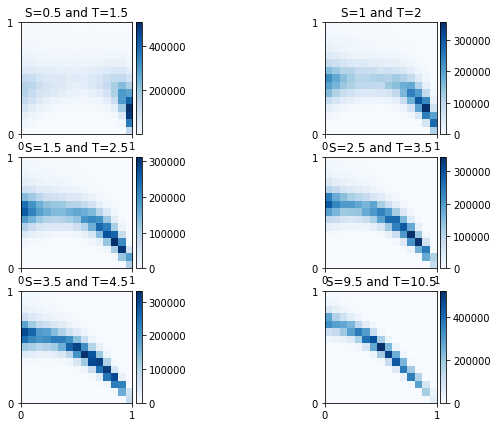

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7));

for i, snow in enumerate(snows):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(snow)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"S={snow_Ss[i]} and T={snow_Ts[i]}")


# For harmony game (left up quadrant) S > 0 and T <= 1

In [36]:
harmony_Ss = [0.5, 0.7, 1.5, 1.5]
harmony_Ts = [-.7, .4, -.5, .5]

In [37]:
[game(S, T) for S, T in zip(harmony_Ss, harmony_Ts)]

[(1, 0.5, -0.7, 0), (1, 0.7, 0.4, 0), (1, 1.5, -0.5, 0), (1, 1.5, 0.5, 0)]

In [43]:
harmonies = []
for label in names:
    df = pd.read_csv(f"matlab/data/harmony/harmony_game_{label}.csv", header=None)
    df.columns = columns
    
    harmonies.append(df)

In [44]:
initial = pd.DataFrame({"y":[0], 
                        "p":[0],
                        "q":[0],
                        "average cooperation rate":[0],
                        "average score":[0],
                        "t":[0],})

In [45]:
harmonies[-2] = harmonies[-2].append(initial)

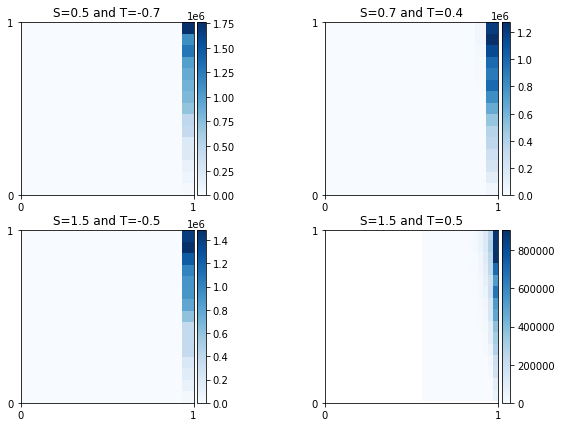

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, harmony in enumerate(harmonies):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(harmony)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"S={harmony_Ss[i]} and T={harmony_Ts[i]}")

In [48]:
harmonies = []
for label in names:
    df = pd.read_csv(f"matlab/data/harmony/harmony_game_{label}_stochastic.csv", header=None)
    df.columns = columns
    
    harmonies.append(df)

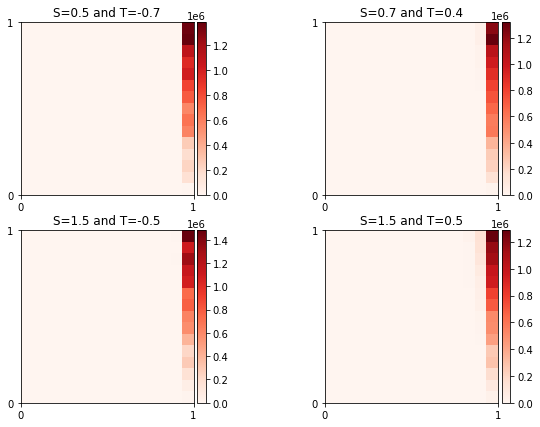

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, harmony in enumerate(harmonies):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(harmony)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"S={harmony_Ss[i]} and T={harmony_Ts[i]}");

# For stag hunt (left lower quadrant) S <=0 and T < 1

In [50]:
stag_Ss = [-.5, -1.5, -1, -.2]
stag_Ts = [.5, -.5, 0, -.7]

In [54]:
[game(S, T) for S, T in zip(stag_Ss, stag_Ts)]

[(1, -0.5, 0.5, 0), (1, -1.5, -0.5, 0), (1, -1, 0, 0), (1, -0.2, -0.7, 0)]

In [57]:
stags = []
for label in names:
    df = pd.read_csv(f"matlab/data/stag/stag_game_{label}.csv", header=None)
    df.columns = columns
    
    stags.append(df)

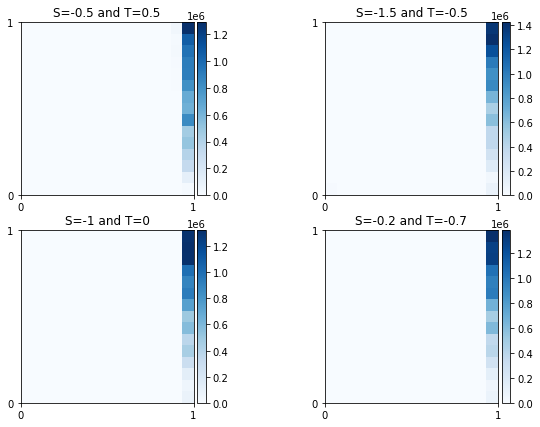

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, stag in enumerate(stags):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(stag)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"S={stag_Ss[i]} and T={stag_Ts[i]}");

In [ ]:
stags = []
for label in names:
    df = pd.read_csv(f"matlab/data/stag/stag_game_{label}_stochastic.csv", header=None)
    df.columns = columns
    
    stags.append(df)

# For prisoner's dilemma (right lower quadrant) S <=0 and T >1

In [60]:
pd_Ss = [-.5, -.5, -1.5, -1.5]
pd_Ts = [1, 2, 1.5, 2.5]

In [61]:
[game(S, T) for S, T in zip(pd_Ss, pd_Ts)]

[(1, -0.5, 1, 0), (1, -0.5, 2, 0), (1, -1.5, 1.5, 0), (1, -1.5, 2.5, 0)]

**Expected payoffs**

In [63]:
pds = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd/pd_game_{label}.csv", header=None)
    df.columns = columns
    pds.append(df)

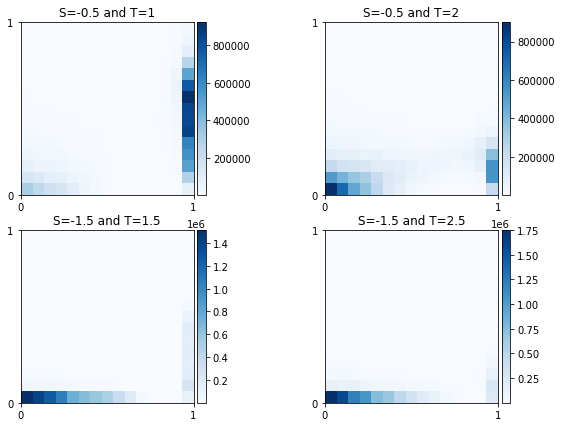

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(pds):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"S={pd_Ss[i]} and T={pd_Ts[i]}");

In [67]:
pds = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd/pd_game_{label}_stochastic.csv", header=None)
    df.columns = columns
    pds.append(df)

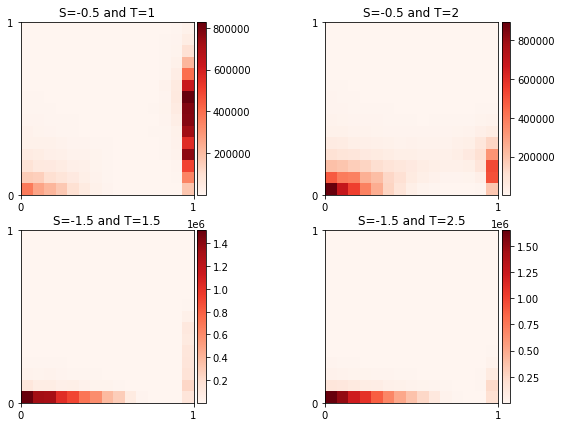

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(pds):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"S={pd_Ss[i]} and T={pd_Ts[i]}");

# Prisoner's Dilemma and Snowdrift game

In [74]:
pairs = [(1, 5), (2, 9), (3, 8), (5, 6)]

In [84]:
evol_dynamics.donation_game(*pairs[0])

(4, -1, 5, 0)

In [85]:
evol_dynamics.snowdrift_game(*pairs[0])

(4.5, 4, 5, 0)

In [86]:
pds = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd_and_snow/pd_game_{label}.csv", header=None)
    df.columns = columns
    pds.append(df)

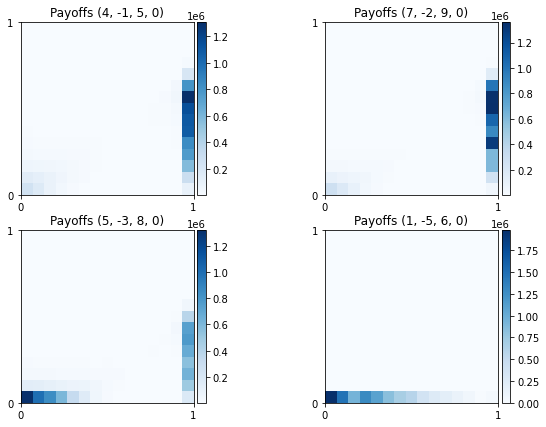

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(pds):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"Payoffs {evol_dynamics.donation_game(*pairs[i])}");

In [88]:
pds = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd_and_snow/pd_game_{label}_stochastic.csv", header=None)
    df.columns = columns
    pds.append(df)

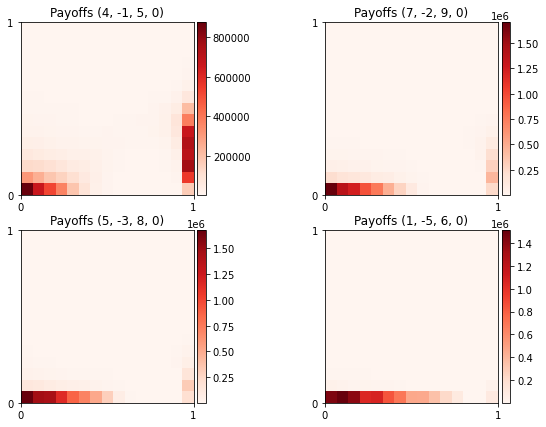

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(pds):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"Payoffs {evol_dynamics.donation_game(*pairs[i])}");

In [90]:
snows = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd_and_snow/snow_game_{label}.csv", header=None)
    df.columns = columns
    snows.append(df)

In [1]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(snows):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 5))
    axes[index].set_yticks(np.linspace(0, 1, 5))
    
    axes[index].title.set_text(f"Payoffs {evol_dynamics.snowdrift_game(*pairs[i])}");

NameError: name 'plt' is not defined

In [93]:
pds = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd_and_snow/snow_game_{label}_stochastic.csv", header=None)
    df.columns = columns
    pds.append(df)

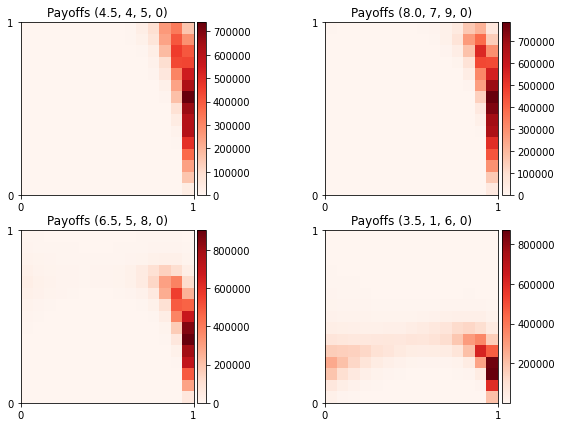

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(snows):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    axes[index].title.set_text(f"Payoffs {evol_dynamics.snowdrift_game(*pairs[i])}");